In [6]:
import os
path = os.getcwd()
parent = os.path.dirname(path)
file_path = parent + "/csv/dummy-use-case-6-events.csv"

import sys

if __name__ == '__main__':
    print(sys.argv)
    print(file_path)



# import sys

# accept command line arguments
# inputArg1 = sys.argv[1]

#print('inputArg1: ',inputArg1)


['/home/rafaelapb/.local/lib/python3.8/site-packages/ipykernel_launcher.py', '--ip=127.0.0.1', '--stdin=9003', '--control=9001', '--hb=9000', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"7974a5c5-9aeb-49fd-8dac-69e90ee2f9f6"', '--shell=9002', '--transport="tcp"', '--iopub=9004', '--f=/home/rafaelapb/.local/share/jupyter/runtime/kernel-v2-560748dG9Jd8C2r4Le.json']
/home/rbelchior/blockchain-integration-framework/packages/cactus-plugin-cc-tx-visualization/src/main/csv/dummy-use-case-6-events.csv


In [7]:
# uncomment if problems with dependencies
#%pip install pm4py
#%pip install pandas
import pm4py
import datetime as dt
import time
import pandas

# process mining
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

# viz
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization

from pm4py.objects.conversion.process_tree import converter as pt_converter



In [8]:
def import_csv_original(file_path):
    event_log = pandas.read_csv(file_path, sep=';')
    event_log = pm4py.format_dataframe(event_log, case_id='caseID', activity_key='methodName', timestamp_key='timestamp')
    return event_log

def getStartActivities(event_log):
    s = pm4py.get_start_activities(event_log)
    print("Start activities: {}\n".format(s))
    return s
def getEndActivities(event_log):
    e = pm4py.get_end_activities(event_log)
    print("End activities: {}\n".format(e))
    return (e)

def getAttributeFromLog(event_log, attr):
    entries = pm4py.get_event_attribute_values(event_log,attr)
    print("Entries: {}\n".format(entries))
    return entries

In [9]:
print(file_path)
log = import_csv_original(file_path)
print(log)
print("leght is", len(log))
startAct = getStartActivities(log)
endAct = getEndActivities(log)
timestamps = getAttributeFromLog(log, "timestamp")



/home/rbelchior/blockchain-integration-framework/packages/cactus-plugin-cc-tx-visualization/src/main/csv/dummy-use-case-6-events.csv
   caseID                             receiptID  \
0       1  22f4047b-e535-4c39-bb03-8d04e34d1695   
1       1  d1240a53-5a61-406f-8cc6-9ad67af4f9f5   
2       1  dfb40544-9773-431f-b1a1-43c684758dbe   
3       1  8f7ea55a-a6a4-4bfd-b6d3-b389b07a8965   
4       1  fd8eee3f-c51d-4e87-b18c-e4b33c193189   
5       1  621bd494-d616-407e-a514-75f01a932657   

                         timestamp blockchainID invocationType  \
0 2022-06-20 09:51:18.855000+00:00         TEST           send   
1 2022-06-20 09:51:18.857000+00:00         TEST           send   
2 2022-06-20 09:51:18.858000+00:00         TEST           send   
3 2022-06-20 09:51:18.859000+00:00         TEST           send   
4 2022-06-20 09:51:18.860000+00:00         TEST           send   
5 2022-06-20 09:51:18.861000+00:00         TEST           send   

         methodName parameters identity  cost 

->( 'initialize asset', 'lock asset', 'mint asset', *( 'transfer asset', tau ), 'burn asset' )


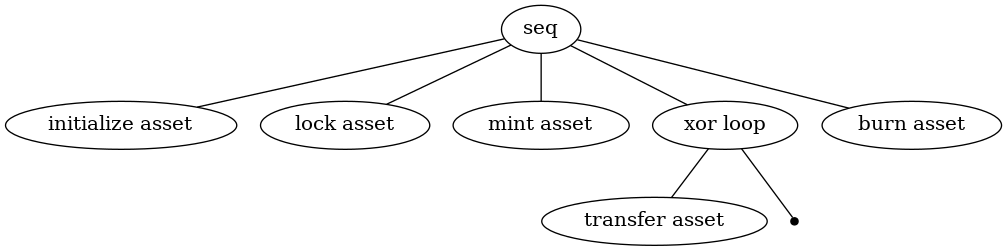

Execution Time : 0.001
Execution Time (ms): 1.354


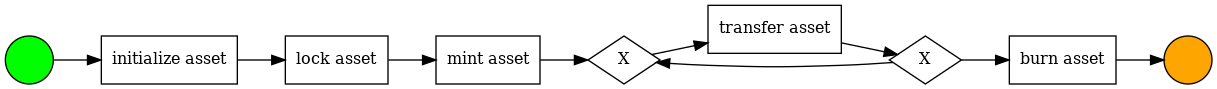

Start Time : 17653.912608694
End Time : 17653.916825089
Execution Time : 0.004
Execution Time (ms): 4.216


In [12]:
#Another way to discover the tree
# # create the process tree
#tree = inductive_miner.apply_tree(log)

# viz
#gviz = pt_visualizer.apply(tree)
#pt_visualizer.view(gviz)# convert the process tree to a petri net

start_time = time.perf_counter()
process_tree = pm4py.discover_process_tree_inductive(log)
print(process_tree)
end_time = time.perf_counter()
pm4py.view_process_tree(process_tree)

start_time_2 = time.perf_counter()
bpmn_model = pm4py.convert_to_bpmn(process_tree)
end_time_2 = time.perf_counter()
print(f"Execution Time : {end_time_2 - start_time_2:0.3f}" )
timeDiff_2 = end_time_2 - start_time_2
print(f"Execution Time (ms): {timeDiff_2*1000:0.3f}" )

pm4py.view_bpmn(bpmn_model)

print(f"Start Time : {start_time}")
print(f"End Time : {end_time}")
timeDiff_3 = end_time - start_time
print(f"Execution Time : {timeDiff_3:0.3f}")
print(f"Execution Time (ms): {timeDiff_3*1000:0.3f}" )


#net, initial_marking, final_marking = pt_converter.apply(tree)

# alternatively, use the inductive_miner to create a petri net from scratch
# net, initial_marking, final_marking = inductive_miner.apply(log)

# viz
parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}



/home/rafaelapb/.local/lib/python3.8/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:82: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_reduced = df[{case_id_glue, activity_key, target_activity_key}]


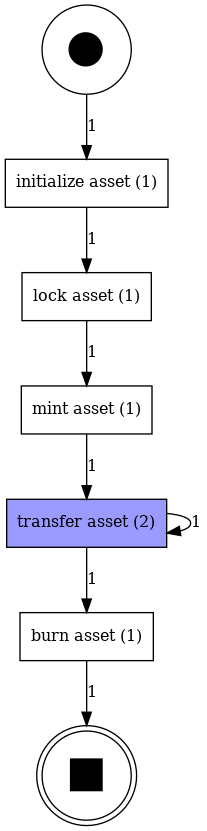

{'initialize asset': (node:initialize asset connections:{lock asset:[0.5]}), 'lock asset': (node:lock asset connections:{mint asset:[0.5]}), 'mint asset': (node:mint asset connections:{transfer asset:[0.5]}), 'transfer asset': (node:transfer asset connections:{transfer asset:[0.5], burn asset:[0.5]}), 'burn asset': (node:burn asset connections:{})}


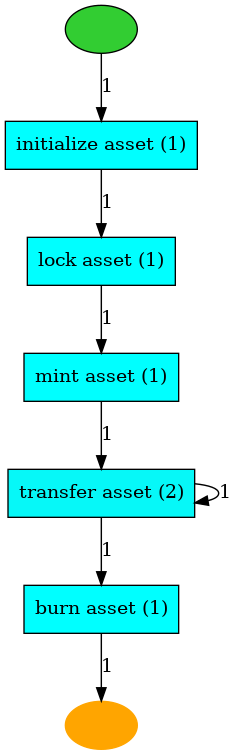

In [13]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log)
pm4py.view_dfg(dfg, start_activities, end_activities)

map = pm4py.discover_heuristics_net(log)
print(map)
pm4py.view_heuristics_net(map)

->( 'initialize asset', 'lock asset', 'mint asset', *( 'transfer asset', tau ), 'burn asset' )


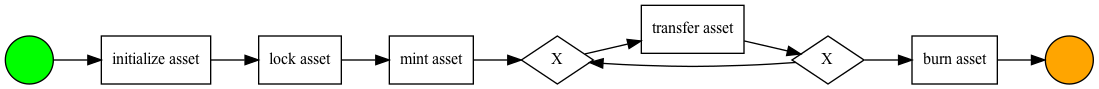

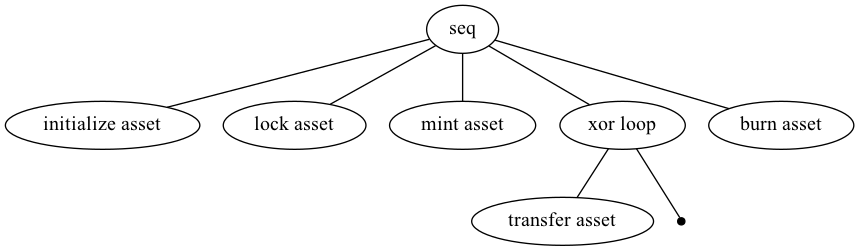

/home/rafaelapb/.local/lib/python3.8/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:82: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_reduced = df[{case_id_glue, activity_key, target_activity_key}]
/home/rafaelapb/.local/lib/python3.8/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:82: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_reduced = df[{case_id_glue, activity_key, target_activity_key}]


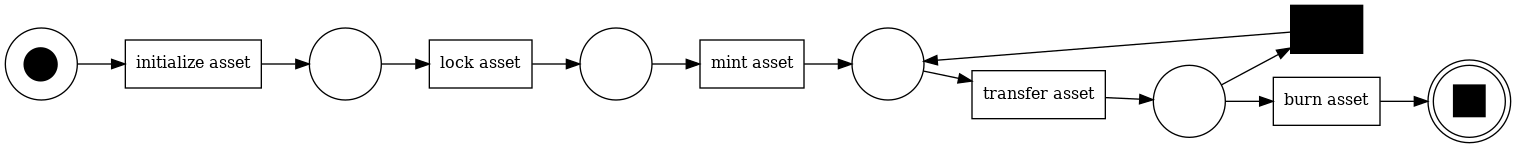

In [14]:
# heuristics miner
net, im, fm = heuristics_miner.apply(log)

# viz
gviz = pn_visualizer.apply(net, im, fm)
pn_visualizer.view(gviz)